In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import string
import nltk
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')

# **Loading the Dataset **

In [5]:
df = pd.read_csv('twitter.csv')
df.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


In [6]:
# datatype  info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31962 entries, 0 to 31961
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      31962 non-null  int64 
 1   label   31962 non-null  int64 
 2   tweet   31962 non-null  object
dtypes: int64(2), object(1)
memory usage: 749.2+ KB


# **Preprocessing the Dataset**

In [7]:
#removes pattern in the input text

def remove_pattern(input_txt , pattern):
  r = re.findall(pattern, input_txt)
  for word in r:
    input_txt = re.sub(word, "", input_txt)
  return input_txt

In [8]:
# remove twitter handles(@user)
df['clean_tweet'] = np.vectorize(remove_pattern)(df['tweet'], "@[\w]*")
df.head()

,id,label,tweet,clean_tweet
0,1,0,@user when a father is dysfunctional and is s...,when a father is dysfunctional and is so sel...
1,2,0,@user @user thanks for #lyft credit i can't us...,thanks for #lyft credit i can't use cause th...
2,3,0,bihday your majesty,bihday your majesty
3,4,0,#model i love u take with u all the time in ...,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation,factsguide: society now #motivation


In [9]:
# remove special charaters , number & punctucations
df['clean_tweet']=df['clean_tweet'].str.replace("[^a-zA-Z#]", " ")
df.head()

,id,label,tweet,clean_tweet
0,1,0,@user when a father is dysfunctional and is s...,when a father is dysfunctional and is so sel...
1,2,0,@user @user thanks for #lyft credit i can't us...,thanks for #lyft credit i can't use cause th...
2,3,0,bihday your majesty,bihday your majesty
3,4,0,#model i love u take with u all the time in ...,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation,factsguide: society now #motivation


In [10]:
#remove short words
df['clean_tweet'] = df['clean_tweet'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))
df.head()

,id,label,tweet,clean_tweet
0,1,0,@user when a father is dysfunctional and is s...,when father dysfunctional selfish drags kids i...
1,2,0,@user @user thanks for #lyft credit i can't us...,thanks #lyft credit can't cause they don't off...
2,3,0,bihday your majesty,bihday your majesty
3,4,0,#model i love u take with u all the time in ...,#model love take with time urð±!!! ððð...
4,5,0,factsguide: society now #motivation,factsguide: society #motivation


In [11]:
#individual words considered as takens
tokenized_tweet = df['clean_tweet'].apply(lambda x: x.split())
tokenized_tweet.head()

,clean_tweet
0,"[when, father, dysfunctional, selfish, drags, ..."
1,"[thanks, #lyft, credit, can't, cause, they, do..."
2,"[bihday, your, majesty]"
3,"[#model, love, take, with, time, urð±!!!, ð..."
4,"[factsguide:, society, #motivation]"


In [12]:
#stem the words
from nltk.stem.porter import *
stemmer = PorterStemmer()

tokenized_tweet = tokenized_tweet.apply(lambda sentence: [stemmer.stem(word) for word in sentence])
tokenized_tweet.head()

,clean_tweet
0,"[when, father, dysfunct, selfish, drag, kid, i..."
1,"[thank, #lyft, credit, can't, caus, they, don'..."
2,"[bihday, your, majesti]"
3,"[#model, love, take, with, time, urð±!!!, ð..."
4,"[factsguide:, societi, #motiv]"


In [13]:
#combine into a single
for i in range(len(tokenized_tweet)):
  tokenized_tweet[i] = ' '.join(tokenized_tweet[i])

df['clean_tweet'] = tokenized_tweet
df.head()

,id,label,tweet,clean_tweet
0,1,0,@user when a father is dysfunctional and is s...,when father dysfunct selfish drag kid into dys...
1,2,0,@user @user thanks for #lyft credit i can't us...,thank #lyft credit can't caus they don't offer...
2,3,0,bihday your majesty,bihday your majesti
3,4,0,#model i love u take with u all the time in ...,#model love take with time urð±!!! ððð...
4,5,0,factsguide: society now #motivation,factsguide: societi #motiv


# **Exploratory Data Analysis**

In [15]:
# !pip install wordcloud

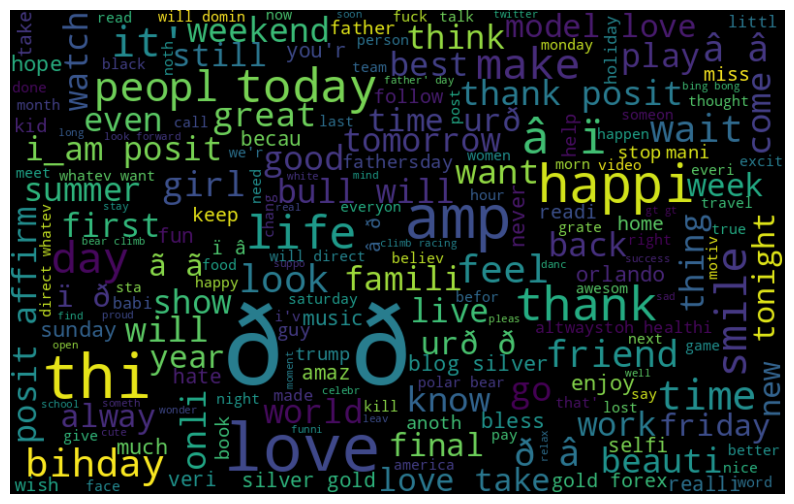

In [16]:
#visualize the frequent words
all_words = " ".join([sentence for sentence in df['clean_tweet']])
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)

#plot the graph
plt.figure(figsize=(10,7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

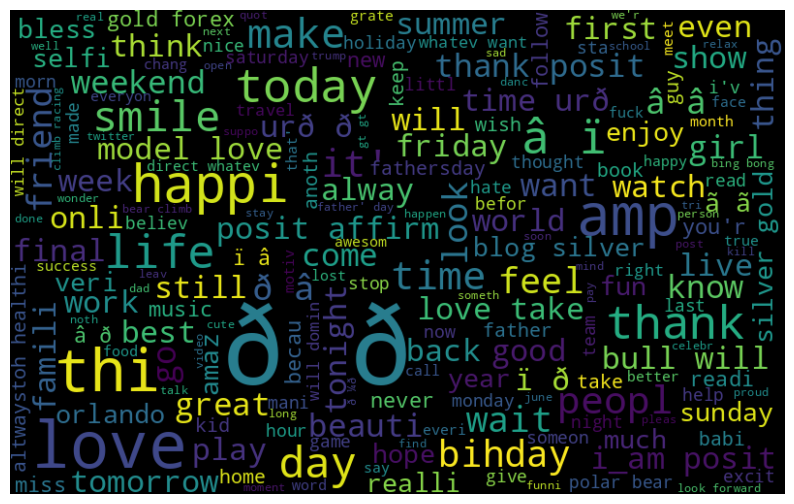

In [17]:
# frequent words visualization for +ve
all_words = " ".join([sentence for sentence in df['clean_tweet'][df['label']==0]])
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)

# plot the graph
plt.figure(figsize=(10,7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


In [19]:
#extract the hashtag
def hashtag_extract(tweets):
  hashtags = []
  #loop  words in the tweet
  for word in tweets:
    ht = re.findall(r"#(\w+)", word)
    hashtags.append(ht)


  return hashtags


In [20]:
#extract hashtag froms non racist/sexist tweets
ht_positive = hashtag_extract(df['clean_tweet'][df['label']==0])

#extarct hashtag from racist/sexist tweets
ht_positive = hashtag_extract(df['clean_tweet'][df['label']==1])

In [22]:
ht_positive[:5]

[['cnn', 'michigan', 'tcot'],
 ['australia',
  'opkillingbay',
  'seashepherd',
  'helpcovedolphin',
  'thecov',
  'helpcovedolphin'],
 [],
 [],
 ['neverump', 'xenophobia']]

In [36]:
#extract hashtag froms non racist/sexist tweets
ht_positive = hashtag_extract(df['clean_tweet'][df['label']==0])

#extarct hashtag from racist/sexist tweets
ht_negative = hashtag_extract(df['clean_tweet'][df['label']==1]) # assign to ht_negative

In [50]:
ht_positive[:5]

(<function sum(iterable, /, start=0)>,
 (<function sum(iterable, /, start=0)>,
  (<function sum(iterable, /, start=0)>,
   [['run'],
    ['lyft', 'disapoint', 'getthank'],
    [],
    ['model'],
    ['motiv'],
    ['allshowandnogo'],
    [],
    ['school',
     'exam',
     'hate',
     'imagin',
     'actorslif',
     'revolutionschool',
     'girl'],
    ['allin', 'cav', 'champion', 'cleveland', 'clevelandcavali'],
    ['gr8'],
    ['ireland', 'blog', 'silver', 'gold', 'forex'],
    ['orlando',
     'standwithorlando',
     'pulseshoot',
     'orlandoshoot',
     'biggerproblem',
     'selfish',
     'heabreak',
     'valu',
     'love'],
    ['80day', 'gettingf'],
    ['got7', 'junior', 'yugyoem', 'omg'],
    ['thank', 'posit'],
    ['friday', 'cooki'],
    [],
    ['euro2016'],
    ['badday', 'coneofsham', 'cat', 'piss', 'funni', 'laugh'],
    ['wine', 'weekend'],
    ['tgif', 'gamedev', 'indiedev', 'indiegamedev', 'squad'],
    ['upsideofflorida', 'shopalyssa', 'love'],
    ['smil

In [53]:
#unnest list
ht_positive = (ht_positive) # remove sum and extra bracket
ht_negative = (ht_negative) # remove sum and extra bracket

In [54]:
ht_positive[:5]

(<function sum(iterable, /, start=0)>,
 (<function sum(iterable, /, start=0)>,
  (<function sum(iterable, /, start=0)>,
   [['run'],
    ['lyft', 'disapoint', 'getthank'],
    [],
    ['model'],
    ['motiv'],
    ['allshowandnogo'],
    [],
    ['school',
     'exam',
     'hate',
     'imagin',
     'actorslif',
     'revolutionschool',
     'girl'],
    ['allin', 'cav', 'champion', 'cleveland', 'clevelandcavali'],
    ['gr8'],
    ['ireland', 'blog', 'silver', 'gold', 'forex'],
    ['orlando',
     'standwithorlando',
     'pulseshoot',
     'orlandoshoot',
     'biggerproblem',
     'selfish',
     'heabreak',
     'valu',
     'love'],
    ['80day', 'gettingf'],
    ['got7', 'junior', 'yugyoem', 'omg'],
    ['thank', 'posit'],
    ['friday', 'cooki'],
    [],
    ['euro2016'],
    ['badday', 'coneofsham', 'cat', 'piss', 'funni', 'laugh'],
    ['wine', 'weekend'],
    ['tgif', 'gamedev', 'indiedev', 'indiegamedev', 'squad'],
    ['upsideofflorida', 'shopalyssa', 'love'],
    ['smil

In [57]:
#extract hashtag froms non racist/sexist tweets
ht_positive = hashtag_extract(df['clean_tweet'][df['label']==0])

#extarct hashtag from racist/sexist tweets
ht_negative = hashtag_extract(df['clean_tweet'][df['label']==1])


#unnest list
ht_positive = [item for sublist in ht_positive for item in sublist]
ht_negative = [item for sublist in ht_negative for item in sublist]

freq = nltk.FreqDist(ht_positive)
d = pd.DataFrame({'Hashtag': list(freq.keys()),
                  'Count': list(freq.values())})
d.head()

,Hashtag,Count
0,run,70
1,lyft,2
2,disapoint,1
3,getthank,2
4,model,374


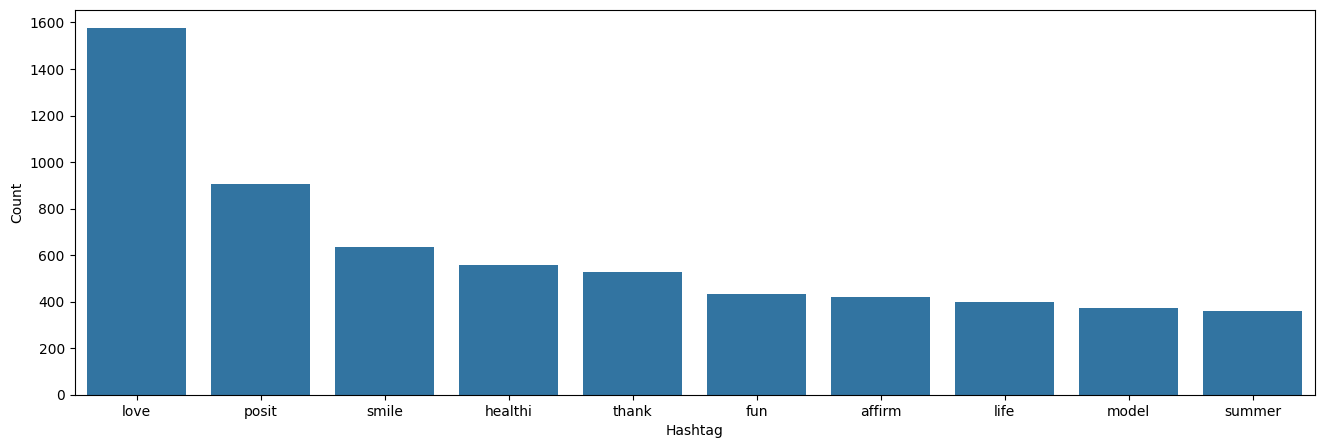

In [58]:
#select top 10 hashtag
d = d.nlargest(columns='Count', n=10)
plt.figure(figsize=(16,5))
ax = sns.barplot(data=d, x='Hashtag', y='Count')
ax.set(ylabel='Count')
plt.show()

In [59]:
freq = nltk.FreqDist(ht_negative)
d = pd.DataFrame({'Hashtag': list(freq.keys()),
                  'Count': list(freq.values())})
d.head()

,Hashtag,Count
0,cnn,9
1,michigan,2
2,tcot,14
3,australia,6
4,opkillingbay,2


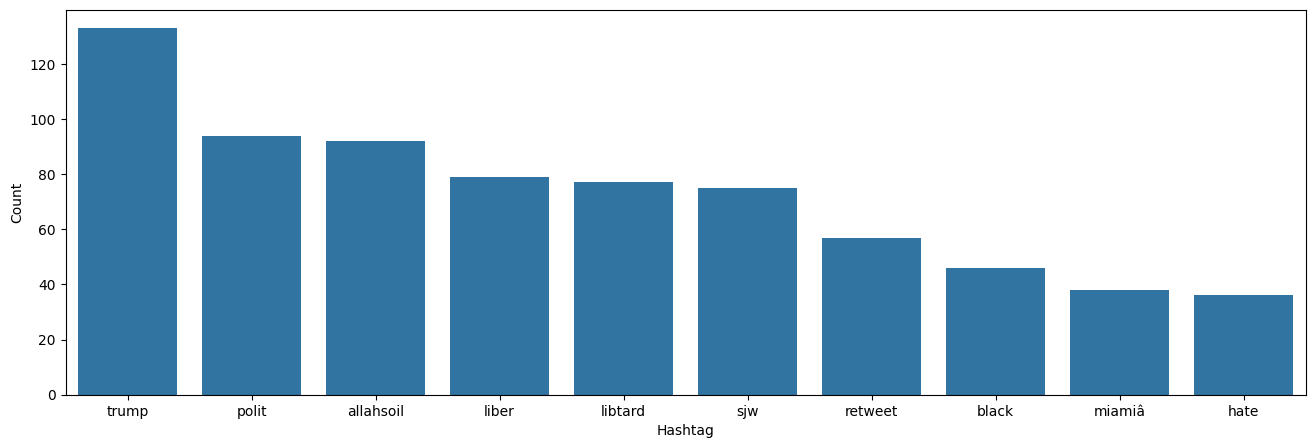

In [60]:
#select top 10 hashtag
d = d.nlargest(columns='Count', n=10)
plt.figure(figsize=(16,5))
ax = sns.barplot(data=d, x='Hashtag', y='Count')
ax.set(ylabel='Count')
plt.show()

# Input **Split**

In [61]:
#feature extraction
from sklearn.feature_extraction.text import CountVectorizer
bow_vectorizer = CountVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english')
bow = bow_vectorizer.fit_transform(df['clean_tweet'])


In [63]:
bow[0].toarray()

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [64]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(bow, df['label'], random_state=42, test_size=0.25)

# **Model Training**

In [70]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, accuracy_score

In [71]:
#training
model = LogisticRegression()
model.fit(x_train, y_train)

LogisticRegression()

In [72]:
#testing
pred = model.predict(x_test)
f1_score(y_test, pred)

0.5083135391923991

In [73]:
accuracy_score(y_test, pred)

0.9481917156801402

In [75]:
#use probablity to get output
pred_prob = model.predict_proba(x_test)
pred = pred_prob[:,1] >= 0.3
pred = pred.astype(int)

f1_score(y_test, pred)

0.560856864654333

In [76]:
accuracy_score(y_test, pred)

0.9435615066950319

In [79]:
pred_prob[0][1]>=0.3

False